In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [29]:
df= pd.read_csv("World Happiness Report 2024.csv")
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [30]:
happy_df = df[df['year'] == 2023]
happy_df.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
14,Afghanistan,2023,1.445909,NaN,0.368478,55.200001,0.228301,NaN,0.738471,0.260513,0.460167
30,Albania,2023,5.444691,9.688706,0.690753,69.199997,0.871545,0.067885,0.855425,0.597349,0.314227
63,Argentina,2023,6.393229,9.993596,0.892118,67.300003,0.831684,-0.129061,0.846094,0.720122,0.301162
80,Armenia,2023,5.679090,9.729613,0.819338,68.199997,0.819376,-0.179444,0.680709,0.574717,0.422631
97,Australia,2023,7.024582,10.846434,0.896460,71.199997,0.875769,0.187309,0.481580,0.731053,0.248163


In [31]:
happy_df['country_id'] = pd.factorize(happy_df['Country name'])[0] + 1

# Display the updated DataFrame
print(happy_df[['Country name', 'country_id']].head())

   Country name  country_id
14  Afghanistan           1
30      Albania           2
63    Argentina           3
80      Armenia           4
97    Australia           5


C:\Users\deena\AppData\Local\Temp\ipykernel_14728\1610315097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_df['country_id'] = pd.factorize(happy_df['Country name'])[0] + 1


In [32]:
happy_df_num = happy_df.drop(columns=['Country name'])


In [33]:
happy_df_num=happy_df_num.set_index("country_id")

In [34]:
happy_df_num = happy_df_num.dropna()

inertia_values = []
for k in range(2, 31):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(happy_df_num)
    inertia_values.append(kmeans.inertia_)
print(inertia_values)


[1061.1164304206202, 511.0019257166211, 357.295156971027, 286.130762890298, 220.11199580530393, 202.2434140425998, 171.1574626163543, 144.92043549763807, 153.84334505603044, 124.7960172746523, 122.98934045305009, 107.56179421059191, 90.8189821678942, 89.24350719031005, 85.34191635299665, 83.50729075462355, 75.20865229894007, 75.58689891960444, 68.1962558352891, 67.93690126555403, 66.14649898560435, 58.76329157031433, 58.65611751305805, 56.37596849225449, 52.428483816531276, 52.62485445690937, 49.28801579850797, 48.0214737102254, 45.20876328582378]


In [35]:
# Count the initial number of rows
initial_row_count = len(happy_df)

# Drop NaN values and count rows after dropping
df_dropped = happy_df_num.dropna()
rows_after_dropping = len(df_dropped)

# Calculate the number of rows dropped
rows_dropped = initial_row_count - rows_after_dropping
print(f"Rows dropped due to NaN values: {rows_dropped}")


Rows dropped due to NaN values: 18


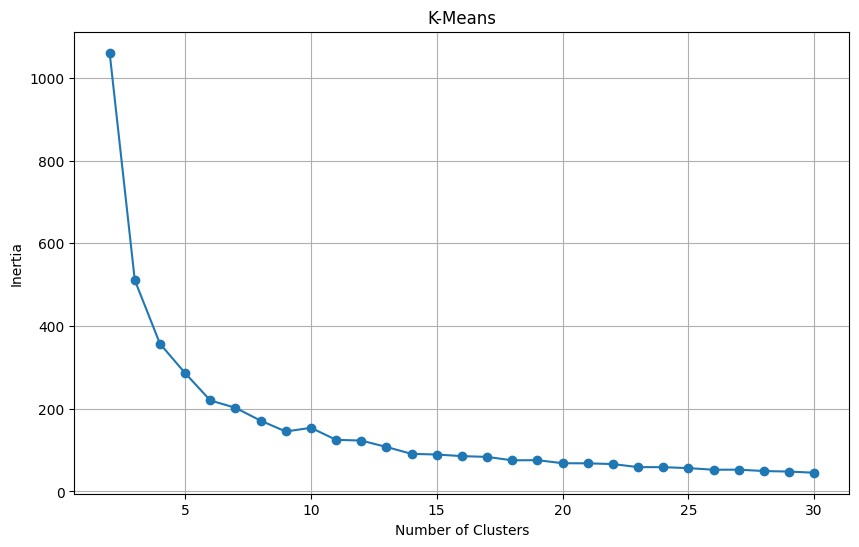

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(2,31),inertia_values, marker= "o")
plt.title('K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [37]:
kmeans=KMeans(n_clusters=8)

In [38]:
cluster_labels=kmeans.fit_predict(happy_df_num)

In [39]:
happy_df_num["cluster"] = cluster_labels

In [40]:
cluster_labels

array([4, 7, 4, 2, 2, 5, 5, 2, 1, 5, 7, 1, 7, 7, 1, 3, 6, 2, 1, 4, 4, 6,
       6, 1, 4, 4, 4, 2, 5, 4, 7, 4, 3, 2, 2, 6, 6, 5, 2, 6, 2, 5, 1, 5,
       7, 2, 3, 5, 0, 5, 2, 2, 2, 6, 2, 0, 7, 6, 7, 3, 7, 0, 6, 4, 2, 6,
       6, 7, 1, 3, 5, 7, 7, 3, 7, 5, 1, 3, 6, 3, 2, 4, 7, 1, 7, 2, 6, 4,
       7, 4, 3, 4, 2, 7, 7, 3, 7, 1, 4, 2, 6, 2, 2, 0, 2, 2, 3, 4, 6, 0,
       4, 3, 5, 4, 7, 7, 7, 7, 1, 1])

In [41]:
grouped= happy_df_num.groupby("cluster")

In [42]:
happy_df_num

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,cluster
country_id,,,,,,,,,,,
2,2023,5.444691,9.688706,0.690753,69.199997,0.871545,0.067885,0.855425,0.597349,0.314227,4
3,2023,6.393229,9.993596,0.892118,67.300003,0.831684,-0.129061,0.846094,0.720122,0.301162,7
4,2023,5.679090,9.729613,0.819338,68.199997,0.819376,-0.179444,0.680709,0.574717,0.422631,4
5,2023,7.024582,10.846434,0.896460,71.199997,0.875769,0.187309,0.481580,0.731053,0.248163,2
6,2023,6.635664,10.930412,0.874427,71.400002,0.874083,0.209268,0.529430,0.712497,0.239608,2
...,...,...,...,...,...,...,...,...,...,...,...
132,2023,6.661722,10.122264,0.908374,67.500000,0.904164,-0.050256,0.661658,0.753448,0.264817,7
133,2023,6.385361,9.025871,0.908859,65.900002,0.926784,0.247137,0.649540,0.751747,0.202207,7
135,2023,6.325115,9.392351,0.844905,65.699997,0.955560,-0.159114,0.655275,0.710068,0.119510,7


In [43]:
for cluster, group in grouped:
    print(f"\ncluster {cluster}")
    sample_country= group.sample(n=5).index
    for country in sample_country:
        print(country)


cluster 0
69
116
54
125
61

cluster 1
11
77
109
48
14

cluster 2
40
5
32
56
114

cluster 3
87
107
67
127
101

cluster 4
31
98
123
37
102

cluster 5
9
80
128
33
7

cluster 6
74
45
75
88
26

cluster 7
133
82
95
105
132


In [54]:
# Assuming:
# - `happy_df` contains 'country_id' and 'Country name'
# - `happy_df_num` contains 'country_id' and 'cluster'

# Merge `happy_df` and `happy_df_num` on 'country_id' to get a table with 'Country name' and 'cluster'
merged_df = happy_df[['country_id', 'Country name']].merge(happy_df_num[['country_id', 'cluster']], on='country_id', how='inner')

# Display the resulting DataFrame
print(merged_df)


KeyError: "['country_id'] not in index"

In [55]:
# Check column names in happy_df
print("Columns in happy_df:", happy_df.columns)

# Check column names in happy_df_num
print("Columns in happy_df_num:", happy_df_num.columns)


Columns in happy_df: Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'country_id'],
      dtype='object')
Columns in happy_df_num: Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'cluster'],
      dtype='object')


In [56]:
happy_df_num.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,cluster
country_id,,,,,,,,,,,
2,2023,5.444691,9.688706,0.690753,69.199997,0.871545,0.067885,0.855425,0.597349,0.314227,4
3,2023,6.393229,9.993596,0.892118,67.300003,0.831684,-0.129061,0.846094,0.720122,0.301162,7
4,2023,5.679090,9.729613,0.819338,68.199997,0.819376,-0.179444,0.680709,0.574717,0.422631,4
5,2023,7.024582,10.846434,0.896460,71.199997,0.875769,0.187309,0.481580,0.731053,0.248163,2
6,2023,6.635664,10.930412,0.874427,71.400002,0.874083,0.209268,0.529430,0.712497,0.239608,2


In [59]:

happy_df_num = happy_df_num.reset_index()


merged_df = happy_df[['country_id', 'Country name']].merge(happy_df_num[['country_id', 'cluster']], on='country_id', how='inner')


merged_df.head()


,country_id,Country name,cluster
0,2,Albania,4
1,3,Argentina,7
2,4,Armenia,4
3,5,Australia,2
4,6,Austria,2


In [60]:
for cluster, group in merged_df.groupby('cluster'):
    print(f"\nCluster {cluster}:")
    country_list = group['Country name'].tolist()
    print(country_list)


Cluster 0:
['Iran', 'Jordan', 'Lebanon', 'Sri Lanka', 'Tunisia']

Cluster 1:
['Benin', 'Botswana', 'Burkina Faso', 'Chad', 'Congo (Kinshasa)', 'Guinea', 'Mali', 'Mozambique', 'Nigeria', 'Sierra Leone', 'Zambia', 'Zimbabwe']

Cluster 2:
['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Netherlands', 'Norway', 'Portugal', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland']

Cluster 3:
['Cambodia', 'Ethiopia', 'India', 'Laos', 'Mauritania', 'Mongolia', 'Myanmar', 'Nepal', 'Philippines', 'Senegal', 'Tanzania', 'Uganda']

Cluster 4:
['Albania', 'Armenia', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Czechia', 'Ecuador', 'Estonia', 'Lithuania', 'New Zealand', 'Panama', 'Peru', 'Poland', 'Slovakia', 'Thailand', 'Türkiye', 'United Kingdom']

Cluster 5:
['Azerbaijan', 'Bangladesh', 'Bolivia', 'Dominican Republic', 'Georgia', 'Guatemala', 'Honduras', 'Indonesia', 'Iraq', 